# **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
train = pd.read_csv('./drive/MyDrive/ADM_Assignment2/sales_train.csv')  
categories = pd.read_csv('./drive/MyDrive/ADM_Assignment2/item_categories.csv')
items = pd.read_csv('./drive/MyDrive/ADM_Assignment2/items.csv')
submission = pd.read_csv('./drive/MyDrive/ADM_Assignment2/sample_submission.csv')
shops = pd.read_csv('./drive/MyDrive/ADM_Assignment2/shops.csv')
test = pd.read_csv('./drive/MyDrive/ADM_Assignment2/test.csv')

# **Exploratory Data Analysis**

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
train[train["item_price"] <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [ ]:
train[["item_price", "item_cnt_day"]].describe().applymap('{:,.2f}'.format)

,item_price,item_cnt_day
count,"2,935,849.00","2,935,849.00"
mean,890.85,1.24
std,"1,729.80",2.62
min,-1.00,-22.00
25%,249.00,1.00
50%,399.00,1.00
75%,999.00,1.00
max,"307,980.00","2,169.00"


In [ ]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,"2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00","2,935,849.00"
mean,14.57,33.00,"10,197.23",890.85,1.24
std,9.42,16.23,"6,324.30","1,729.80",2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,"4,476.00",249.00,1.00
50%,14.00,31.00,"9,343.00",399.00,1.00
75%,23.00,47.00,"15,684.00",999.00,1.00
max,33.00,59.00,"22,169.00","307,980.00","2,169.00"


In [ ]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
categories = categories.astype("category")
categories.describe(include = "all")

,item_category_name,item_category_id
count,84,84
unique,84,84
top,PC - Гарнитуры/Наушники,0
freq,1,1


In [ ]:
items = items.astype("category")
items.describe(include = "all")

,item_name,item_id,item_category_id
count,22170,22170,22170
unique,22170,22170,84
top,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
freq,1,1,5035


In [ ]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
shops = shops.astype("category")
shops.describe(include = "all")

,shop_name,shop_id
count,60,60
unique,60,60
top,"!Якутск Орджоникидзе, 56 фран",0
freq,1,1


In [ ]:
test = test.astype("category")
test.describe(include = "all")

,ID,shop_id,item_id
count,214200,214200,214200
unique,214200,42,5100
top,0,2,30
freq,1,5100,42


In [ ]:
# Count the unique number of shops
shops["shop_id"].nunique() # 60 shops!

60

In [ ]:
# Check again the unique number of shops
train["shop_id"].nunique() # 60 shops!

60

In [ ]:
# Check the number of products
train["item_id"].nunique() # 21,807

21807

In [ ]:
items["item_id"].nunique() # 22,170

22170

In [ ]:
# Calculate the total sales per shop
sales_per_shop = pd.DataFrame(train.groupby(["shop_id"])["item_cnt_day"].sum())
sales_per_shop = sales_per_shop.reset_index()

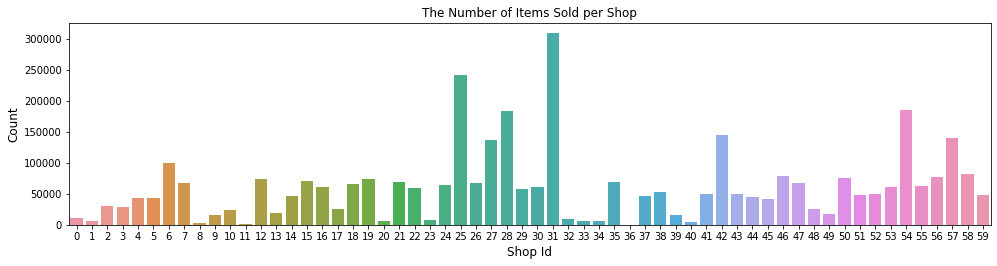

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)
sns.barplot(sales_per_shop['shop_id'], sales_per_shop["item_cnt_day"])
plt.title('The Number of Items Sold per Shop', fontsize = 12)
plt.xlabel('Shop Id', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('./drive/MyDrive/ADM_Assignment2/Shop_Total_Sales.png', dpi=100)

plt.show()

In [ ]:
# Calculate the expensive items
average_price_per_item = pd.DataFrame(train.groupby("item_id")["item_price"].mean())
average_price_per_item = average_price_per_item.reset_index()

In [ ]:
highest_price_30item = average_price_per_item.nlargest(30,'item_price')


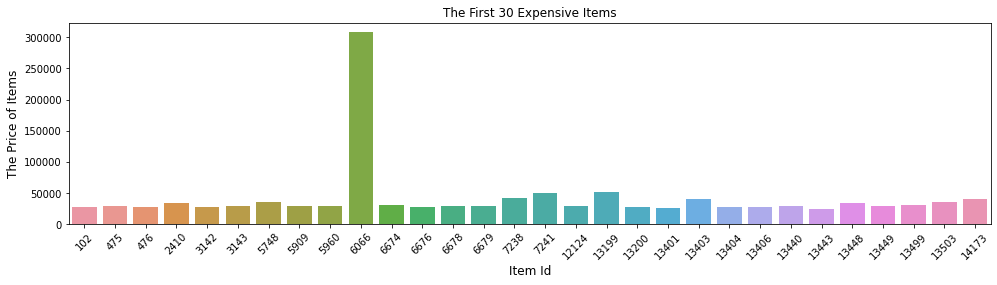

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)
sns.barplot(highest_price_30item["item_id"], highest_price_30item["item_price"])
plt.title('The First 30 Expensive Items', fontsize = 12)
plt.xlabel('Item Id', fontsize = 12)
plt.ylabel('The Price of Items', fontsize = 12)
plt.xticks(rotation=45)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('./drive/MyDrive/ADM_Assignment2/Expensive_Items.png', dpi=100)

plt.show()

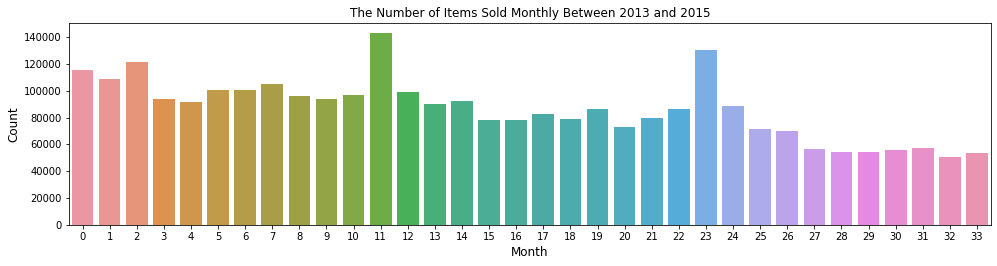

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)
sns.countplot(train['date_block_num'])
plt.title('The Number of Items Sold Monthly Between 2013 and 2015', fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('./drive/MyDrive/ADM_Assignment2/Monthly_Sales.png', dpi=100)

plt.show()

In [ ]:
# Calculate the most profitable product
train["profit"] = (train["item_price"]*train["item_cnt_day"])/1000
profit_per_shop = pd.DataFrame(train.groupby("shop_id")["profit"].sum())
profit_per_shop = profit_per_shop.reset_index()

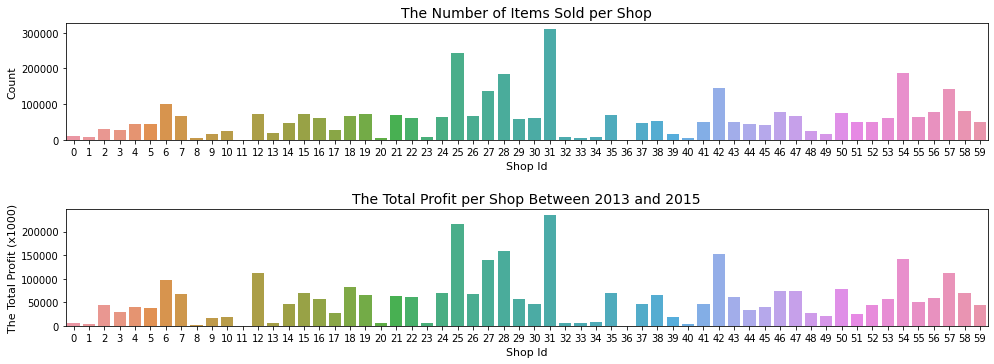

In [ ]:
plt.rcParams['figure.figsize'] = (16, 6)
plt.subplot(211)
sns.barplot(shops['shop_id'], sales_per_shop["item_cnt_day"])
plt.title('The Number of Items Sold per Shop', fontsize = 14)
plt.xlabel('Shop Id', fontsize = 11)
plt.ylabel('Count', fontsize = 11)

plt.subplot(212)
sns.barplot(profit_per_shop["shop_id"], profit_per_shop["profit"])
plt.title('The Total Profit per Shop Between 2013 and 2015', fontsize = 14)
plt.xlabel('Shop Id', fontsize = 11)
plt.ylabel('The Total Profit (x1000)', fontsize = 11)


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)


plt.savefig('./drive/MyDrive/ADM_Assignment2/Sold_Items_and_Profit.png', dpi=100)

plt.show()



In [ ]:
# Calculate the sales of items
total_sales_per_day_item = pd.DataFrame(train.groupby("item_id")["item_cnt_day"].max())
total_sales_per_day_item = total_sales_per_day_item.reset_index()

In [ ]:
highest_sales_per_day_30item = total_sales_per_day_item.nlargest(30,'item_cnt_day')


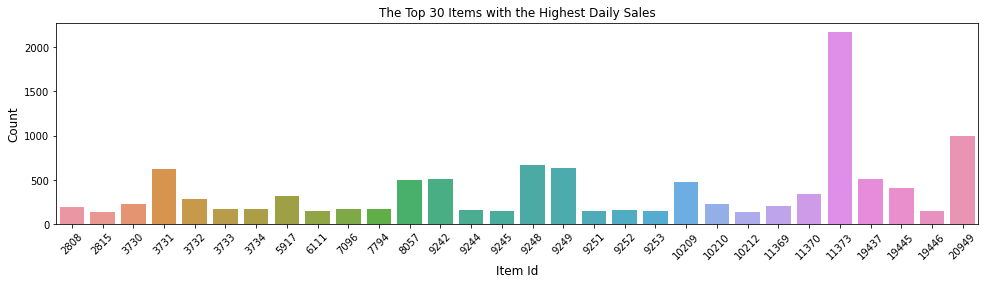

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)
sns.barplot(highest_sales_per_day_30item["item_id"], highest_sales_per_day_30item["item_cnt_day"])
plt.title('The Top 30 Items with the Highest Daily Sales', fontsize = 12)
plt.xlabel('Item Id', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=45)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('./drive/MyDrive/ADM_Assignment2/Highest_Daily_Sales.png', dpi=100)

plt.show()

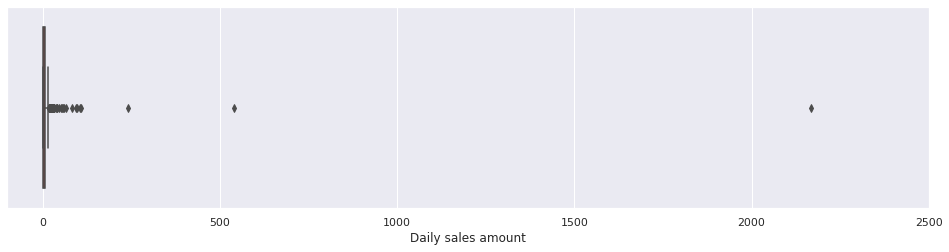

In [ ]:
sns.set()
plt.xlim(-100, 2500)
sns.boxplot(x=train[train["item_id"]== 11373]["item_cnt_day"], saturation = 1, color = "red")
plt.xlabel('Daily sales amount', fontsize = 12)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.savefig('./drive/MyDrive/ADM_Assignment2/Outlier_11373.png', dpi=100)

plt.show()


